### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Anche in questo caso andare a rivedere la lezione teorica per capire quanto serve far crescere la rete per fittare queste ondine. Cerchiamo la rete ottimale e mostriamo questa (ad esempio le predizioni che fa).

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

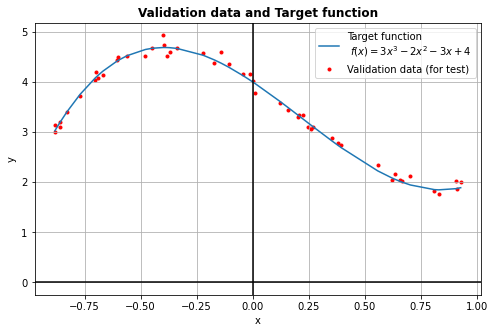

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# ==============================================
# Define parameters of an ideal linear function.
# We want to predict them after
# ==============================================

# parametri da indagare
N_epochs = 30
N_train = 3000 # <<< train
N_valid = 50 # <<< test
Sigma = 0.1

# target parameters of 
# f(x) = 3x^3 - 2x^2 - 3x + 4 
# f(x) = ax^3 + bx^2 + cx + d
a = 3 
b = -2
c = -3
d = 4

# ==============================================
# Generate input data, deviating 
# from ideal behaviour [random noise - sigma]
# ==============================================

np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)        # training inputs
x_valid = np.random.uniform(-1, 1, N_valid)        # ...
x_valid.sort()
y_target = a * x_valid*x_valid*x_valid + b*x_valid*x_valid + c*x_valid + d 
                                                   # target polinomial function

sigma = Sigma                                      # noise standard deviation
y_train = np.random.normal(a * x_train*x_train*x_train + b*x_train*x_train + c*x_train + d, sigma) 
                                                   # array of measures from which we want to guess regression parameters
y_valid = np.random.normal(a * x_valid*x_valid*x_valid + b*x_valid*x_valid + c*x_valid + d, sigma)
                                                   # array of measures from which we want to test prediction ability of the NN

# plot validation and target dataset
plt.figure(figsize=(8,5))
plt.plot(x_valid, y_target, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data (for test)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation data and Target function", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()
plt.show()

In [3]:
# Use PYTHON 3.9.12

# ==============================================
# INITIALIZE Neural Network (Sequential) model:
# Many neurons are needed to make the fitting job
# and activation functions need to be specifief.
# ==============================================

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(200, input_shape=(1,), activation = 'relu')) # <<<<<<<<<<<<<<<<<<<<<<< numero di neuroni
                                        # nota: funzione di attivazione (non lineare), 
                                        # (esplorare quali vanno meglio)
model.add(Dense(100, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# ==============================================
# Get a summary of our composed model
# ==============================================
# model.summary()

# ==============================================
# TRAIN THE MODEL 
# I feed the neuron with the set of (x,y) training 
# pairs. The optimizer finds the best weights 
# minimizing the Mean Square Error loss function 
# ==============================================

# Fit the model over 10 epochs of 32 batch size each.
# Report training progress against validation data
history = model.fit(    x=x_train, y=y_train, 
                        batch_size=32, epochs=N_epochs,
                        # shuffle input before each epoch (not mandatory)
                        shuffle=True,                        
                        validation_data=(x_valid, y_valid))

2022-07-04 13:44:39.888440: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-04 13:44:39.888560: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-04 13:44:49.255911: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-04 13:44:49.255965: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-04 13:44:49.255995: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (martino-ThinkPad-T430s): /proc/driver/nvidia/version does not exist


Epoch 1/30
94/94 [==============================] - 4s 20ms/step - loss: 1.2094 - mse: 1.2094 - val_loss: 0.1830 - val_mse: 0.1830
Epoch 2/30
94/94 [==============================] - 1s 11ms/step - loss: 0.1832 - mse: 0.1832 - val_loss: 0.0731 - val_mse: 0.0731
Epoch 3/30
94/94 [==============================] - 1s 10ms/step - loss: 0.0907 - mse: 0.0907 - val_loss: 0.0473 - val_mse: 0.0473
Epoch 4/30
94/94 [==============================] - 1s 11ms/step - loss: 0.0521 - mse: 0.0521 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 5/30
94/94 [==============================] - 1s 12ms/step - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0158 - val_mse: 0.0158
Epoch 6/30
94/94 [==============================] - 1s 12ms/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 7/30
94/94 [==============================] - 1s 12ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 8/30
94/94 [==============================] - 1s 11ms/step - loss: 0.0185 - m

Guessed parameters
TEST DATA evaluation
Test loss:      0.011659648269414902
Test accuracy:  0.011659648269414902

EXACT CURVE evaluation
Test loss:      0.0021958493161946535
Test accuracy:  0.0021958493161946535


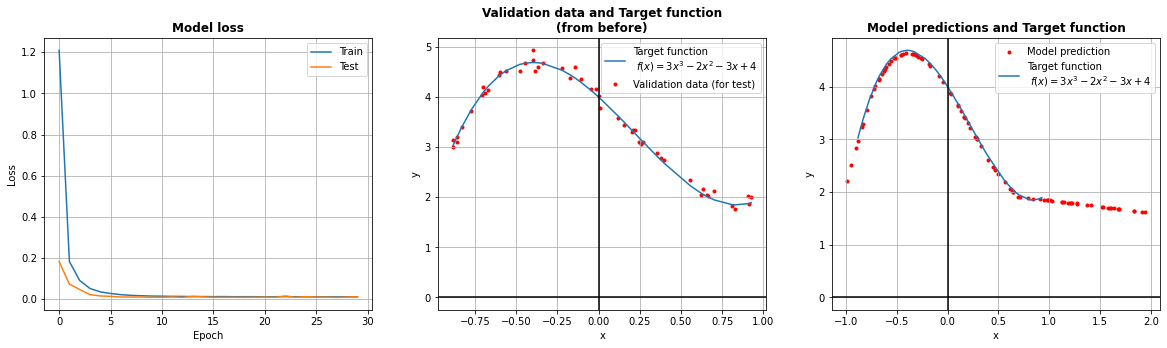

In [5]:
# ==============================================
# Return Weights and Biases
# ==============================================

print("Guessed parameters")
w = model.get_weights()
#print(w)

# ==============================================
# EVALUATE MODEL
# ==============================================

# evaluate with TEST data
print("TEST DATA evaluation")
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()

# evaluate with the EXACT curve
print("EXACT CURVE evaluation")
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])

# ==============================================
# Training history
# ==============================================

plt.figure(figsize=(20,5))

# Plot training & validation loss values
plt.subplot(1,3,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontweight = "bold")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
#plt.show()
#plt.savefig("imgs/sgm_"+str(sigma)+".png")

# ==============================================
# COMPARE MODEL predictions with TARGET FUNCTION
# ==============================================

# generate predictions
x_predicted = np.random.uniform(-1, 2, 100) 
y_predicted = model.predict(x_predicted) # ha dimensione diversa da x_predicted se non finisco con un solo nodo
#print(x_predicted.size)
#print(y_predicted.size)

# (re)plot validation and target dataset
plt.subplot(1,3,2)
plt.plot(x_valid, y_target, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data (for test)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation data and Target function\n(from before)", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()

# plot
plt.subplot(1,3,3)
plt.scatter(x_predicted, y_predicted, marker = ".", color='r', label = "Model prediction")
plt.plot(x_valid, y_target, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model predictions and Target function", fontweight = "bold")
plt.axhline(y=0, color = "k")
plt.axvline(x=0, color = "k")
plt.grid()
plt.legend()
plt.show()